In [162]:
import pandas as pd
from matplotlib import pyplot as plt

In [163]:
df = pd.read_csv('MLOutputs/all_adhoc_with_class.csv')

C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [164]:
#filter to only show subreddit conspiracy
df = df[df['subreddit'] == 'Conservative']

In [165]:
df = df.drop(['Unnamed: 0'], axis=1)

In [166]:
df_0 = df[df['class'] == 0]
df_1 = df[df['class'] == 1]
df_2 = df[df['class'] == 2]

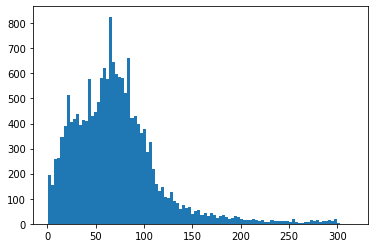

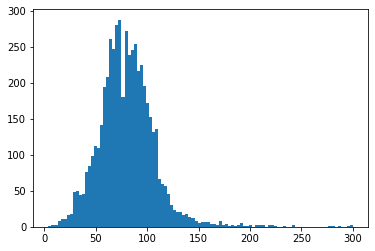

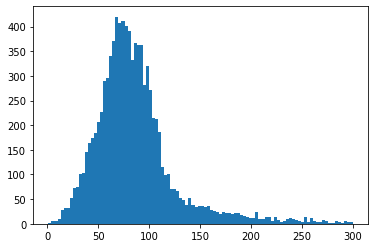

In [167]:
dfs = [df_0, df_1, df_2]
#plot character count of each class's posts
for i in dfs:
    plt.hist(i["title"].str.len(), bins=100)
    plt.show()

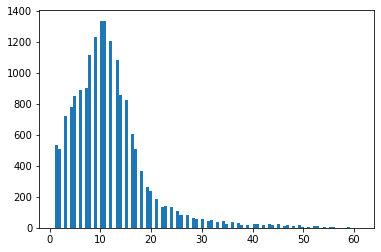

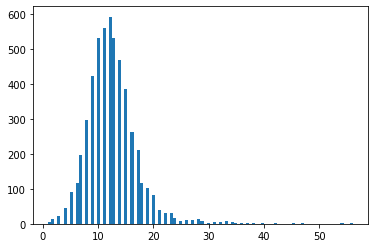

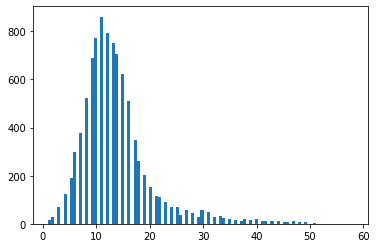

In [168]:
#plot word count of title in each class histogram
for i in dfs:
    plt.hist(i["title"].str.split().str.len(), bins=100)
    plt.show()

In [169]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import defaultdict

In [170]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
def get_corpus(df):
    corpus = []
    for i in df['title']:
        words = word_tokenize(i)
        words = [w for w in words if w not in stop]
        corpus.append(words)
    return corpus

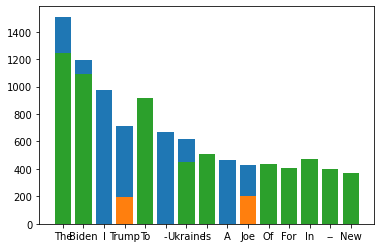

In [172]:
for df in dfs:
    corpus = []
    title = df['title'].str.split()
    title = title.values.tolist()
    corpus = [word for i in title for word in i]
    dic = defaultdict(int)
    for word in corpus:
        if word not in stop:
            dic[word] += 1
    top = sorted(dic.items(), key=lambda X:X[1], reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [174]:
def generate_top_ngrams(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:5]
    x,y=map(list,zip(*top_n_bigrams))
    return list(zip(x,y))

In [175]:
df_ngrams_0 = pd.DataFrame(generate_top_ngrams(df_0['title']), columns=['ngram', 'count'])
df_ngrams_1 = pd.DataFrame(generate_top_ngrams(df_1['title']), columns=['ngram', 'count'])
df_ngrams_2 = pd.DataFrame(generate_top_ngrams(df_2['title']), columns=['ngram', 'count'])

C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [176]:
print(df_ngrams_0)
print(df_ngrams_1)
print(df_ngrams_2)

            ngram  count
0  the daily wire     67
1    state of the     61
2    of the union     55
3  let go brandon     47
4    do you think     45
                    ngram  count
0          the daily wire     52
1    florida gov desantis     33
2  washington free beacon     30
3     invasion of ukraine     21
4            state of the     18
                ngram  count
0      the daily wire     52
1        state of the     39
2        of the union     37
3  black lives matter     37
4    covid 19 vaccine     36
